<h2>Data Analysis & Visualization - CA1</h2>

<h5>Data Selection</h5>

<h7>The Dataset has been sourced from - https://www.kaggle.com/datasets/adityadesai13/used-car-dataset-ford-and-mercedes?rvi=1</h7>


In [2]:
import os
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif 
from sklearn.linear_model import LinearRegression, Ridge
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr


In [3]:
cwd = os.getcwd()
os.chdir("D:/Year 4/DAV/DAV-CA1")
data = pd.read_csv("vw.csv")
print(data.isnull().sum())
print(data)

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64
        model  year  price transmission  mileage fuelType  tax   mpg  \
0       T-Roc  2019  25000    Automatic    13904   Diesel  145  49.6   
1       T-Roc  2019  26883    Automatic     4562   Diesel  145  49.6   
2       T-Roc  2019  20000       Manual     7414   Diesel  145  50.4   
3       T-Roc  2019  33492    Automatic     4825   Petrol  145  32.5   
4       T-Roc  2019  22900    Semi-Auto     6500   Petrol  150  39.8   
...       ...   ...    ...          ...      ...      ...  ...   ...   
15152     Eos  2012   5990       Manual    74000   Diesel  125  58.9   
15153     Fox  2008   1799       Manual    88102   Petrol  145  46.3   
15154     Fox  2009   1590       Manual    70000   Petrol  200  42.0   
15155     Fox  2006   1250       Manual    82704   Petrol  150  46.3   
15156     Fox  2007   2295       

<h5>Imputation Of Missing Data</h5>
If your data is not complete you will need to infer values to complete the dataset.

In [4]:
print("Before --------------------------")
print(data.isnull().sum())

imputers = {
    'price': SimpleImputer(strategy='median'),
    'year': SimpleImputer(strategy='most_frequent'),
    'transmission': SimpleImputer(strategy='most_frequent'),
    'mileage': SimpleImputer(strategy='median'),
    'fuelType': SimpleImputer(strategy='most_frequent'),
    'tax': SimpleImputer(strategy='mean'),
    'mpg': KNNImputer(n_neighbors=5),
    'engineSize': KNNImputer(n_neighbors=5)
}

for col, imputer in imputers.items():
    if col == 'model':
        data[col]
    else:
        imputed_data = imputer.fit_transform(data[col].values.reshape(-1, 1))
        data[col] = imputed_data.squeeze()

print("After --------------------------")
print(data.isnull().sum())

print("Data --------------------------")
print(data)

Before --------------------------
model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64
After --------------------------
model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64
Data --------------------------
        model  year    price transmission  mileage fuelType    tax   mpg  \
0       T-Roc  2019  25000.0    Automatic  13904.0   Diesel  145.0  49.6   
1       T-Roc  2019  26883.0    Automatic   4562.0   Diesel  145.0  49.6   
2       T-Roc  2019  20000.0       Manual   7414.0   Diesel  145.0  50.4   
3       T-Roc  2019  33492.0    Automatic   4825.0   Petrol  145.0  32.5   
4       T-Roc  2019  22900.0    Semi-Auto   6500.0   Petrol  150.0  39.8   
...       ...   ...      ...          ...      ...      ...    ...   ...   
15152     Eos  2012

In [53]:
print(data)

        model  year    price transmission  mileage fuelType    tax    mpg  \
0       T-Roc  2019  25000.0    Automatic  13904.0   Diesel  145.0  14.88   
1       T-Roc  2019  26883.0    Automatic   4562.0   Diesel  145.0  14.88   
2       T-Roc  2019  20000.0       Manual   7414.0   Diesel  145.0  15.12   
3       T-Roc  2019  33492.0    Automatic   4825.0   Petrol  145.0   9.75   
4       T-Roc  2019  22900.0    Semi-Auto   6500.0   Petrol  150.0  11.94   
...       ...   ...      ...          ...      ...      ...    ...    ...   
15152     Eos  2012   5990.0       Manual  74000.0   Diesel  125.0  17.67   
15153     Fox  2008   1799.0       Manual  88102.0   Petrol  145.0  13.89   
15154     Fox  2009   1590.0       Manual  70000.0   Petrol  200.0  12.60   
15155     Fox  2006   1250.0       Manual  82704.0   Petrol  150.0  13.89   
15156     Fox  2007   2295.0       Manual  74000.0   Petrol  145.0  13.89   

       engineSize  
0            0.40  
1            0.40  
2            0.

<h5>Normalisation</h5>
In order to compare variables you will need to normalise them. Choose an appropriate
normalisation.

<h5>Multivariate Analysis</h5>
Analyse and report on the structure of the data. Decide what are the most important
variables and what should be excluded from the index.

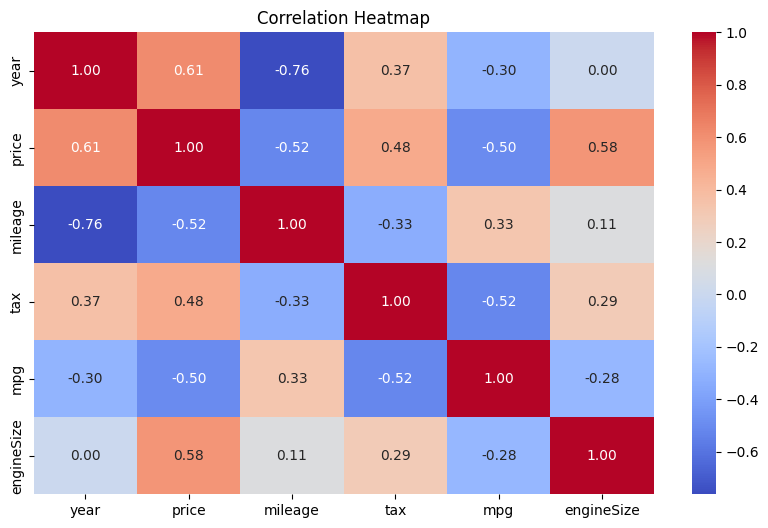

Dependent Variable (DV): price
Independent Variables (IVs): ['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize']


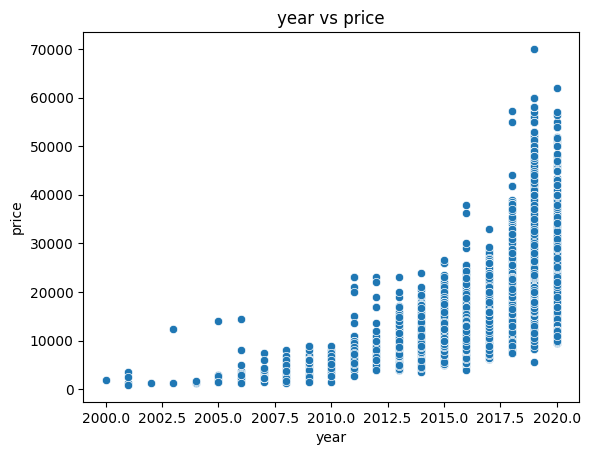

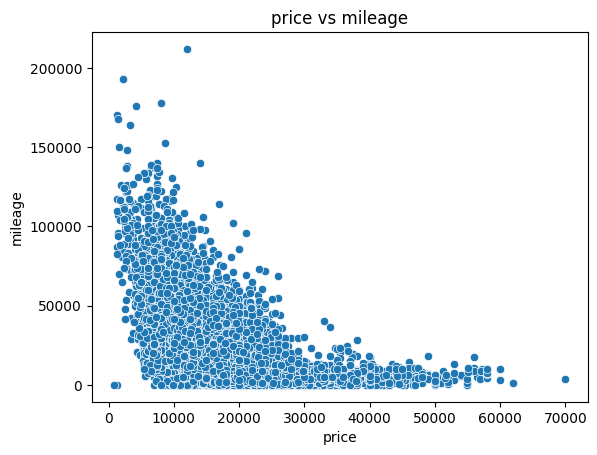

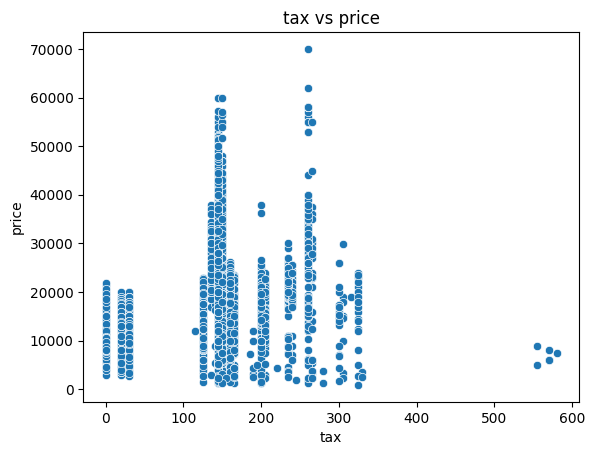

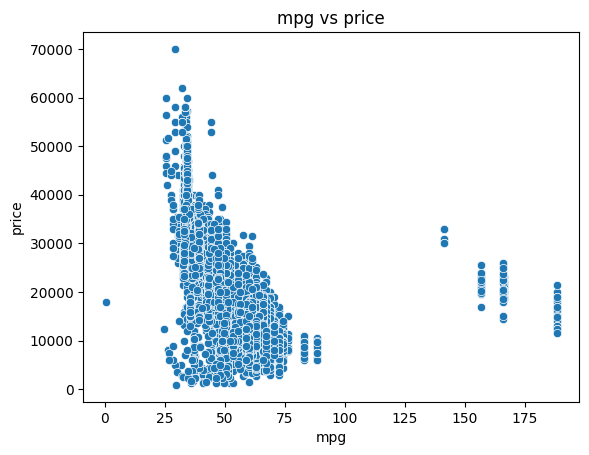

In [5]:
df = pd.DataFrame(data)
df = df.drop(['model'], axis=1)
df = df.drop(['transmission'], axis=1)
df = df.drop(['fuelType'], axis=1)

# 1. Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# 2. Determining DV and IVs
DV = 'price'
IVs = ['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize']

print("Dependent Variable (DV):", DV)
print("Independent Variables (IVs):", IVs)

# 3. Plotting
plt.figure()
sns.scatterplot(data=df, x='year', y='price')
plt.title(f'year vs price')
plt.show()

plt.figure()
sns.scatterplot(data=df, x='price', y='mileage')
plt.title(f'price vs mileage')
plt.show()

plt.figure()
sns.scatterplot(data=df, x='tax', y='price')
plt.title(f'tax vs price')
plt.show()

plt.figure()
sns.scatterplot(data=df, x='mpg', y='price')
plt.title(f'mpg vs price')
plt.show()

In [55]:
# 4. Pearson correlation and p-value
correlations = {}
p_values = {}
for col in df.columns:
    if df[col].dtype != 'object' and col != 'price':
        corr, p_val = pearsonr(df[col], df['price'])
        correlations[col] = corr
        p_values[col] = p_val

print("Correlations:")
for col, corr in correlations.items():
    print(f"{col}: {corr:.2f}")

print("\nP-values:")
for col, p_val in p_values.items():
    print(f"{col}: {p_val:.4f}")

# 5. Determining what to drop
#No values are needed to be dropped as of yet

Correlations:
year: 0.61
mileage: -0.52
tax: 0.48
mpg: -0.50
engineSize: 0.58

P-values:
year: 0.0000
mileage: 0.0000
tax: 0.0000
mpg: 0.0000
engineSize: 0.0000


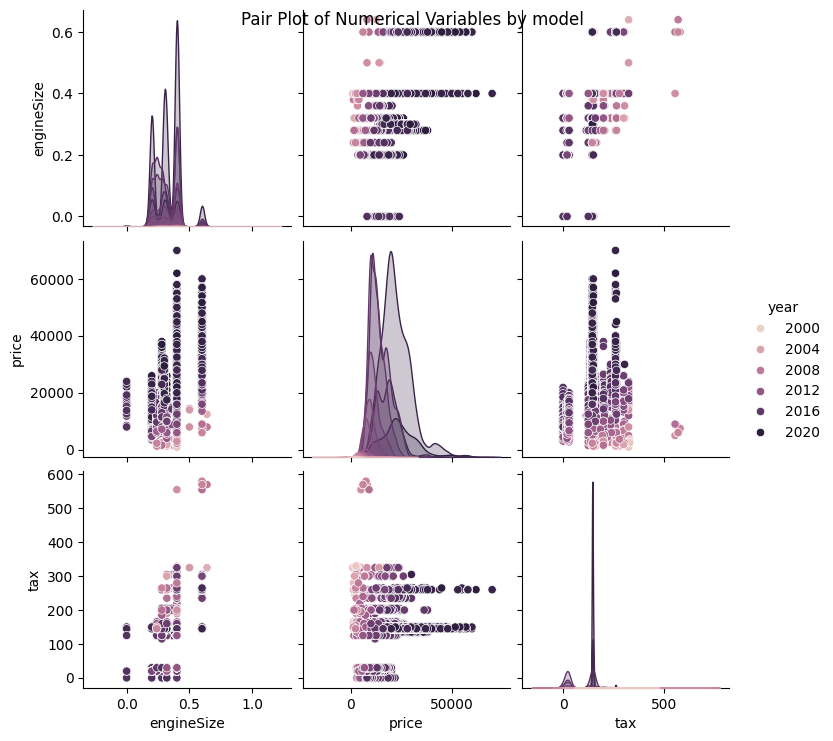

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


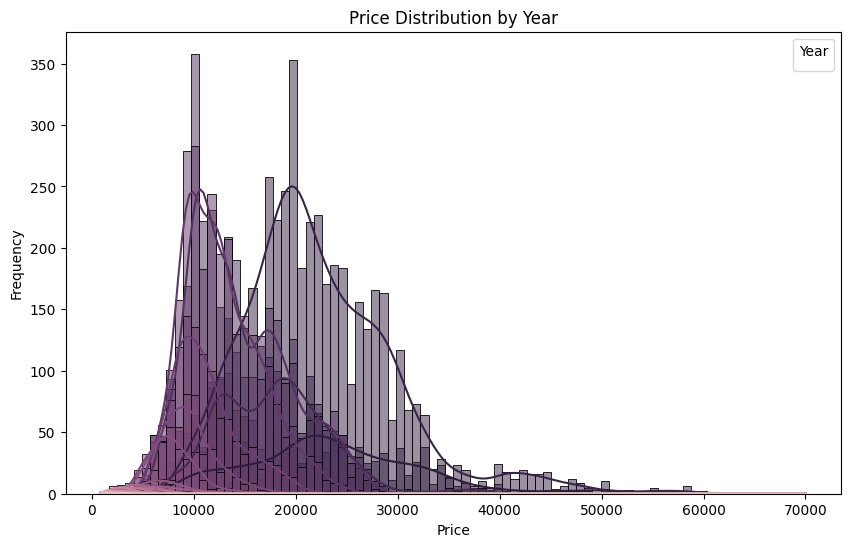

In [56]:
sns.pairplot(df, vars=['engineSize', 'price', 'tax'], hue='year')
plt.suptitle('Pair Plot of Numerical Variables by model')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='price', hue='year', kde=True)
plt.title('Price Distribution by Year')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend(title='Year', loc='upper right')
plt.show()

PCA

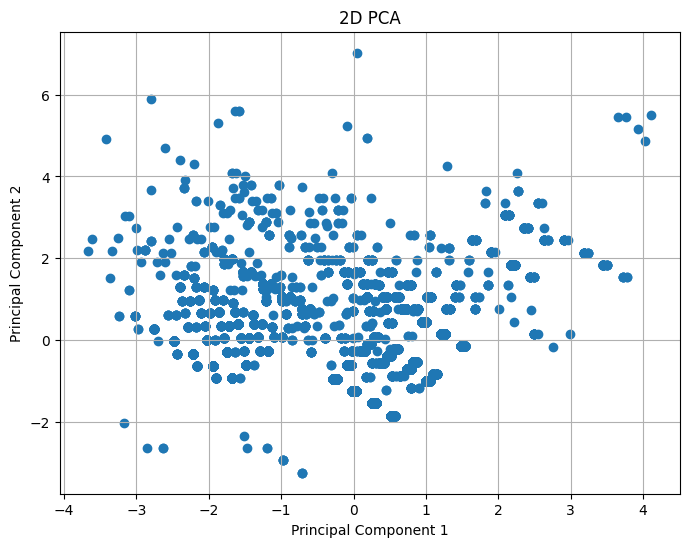

In [8]:
df = pd.DataFrame(data)

features = ['year', 'tax', 'engineSize']

x = df.loc[:, features].values

x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])

finalDf = pd.concat([principalDf, df[['price']]], axis=1)

plt.figure(figsize=(8, 6))
plt.scatter(finalDf['PC1'], finalDf['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA')
plt.grid(True)
plt.show()

Linear Regression

In [16]:
df = pd.DataFrame(data)

X = df[['price', 'mileage', 'tax', 'mpg', 'engineSize']]
y = df['year']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 1.4389487368868499
R-squared (R2) Score: 0.6663371240543232


<h5>Weighting and Aggregation</h5>


C:\Users\Campi\AppData\Local\Temp\ipykernel_12456\1913479920.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1258.5152  417.7352  674.4368  440.9435  592.0866    7.8514    7.8514
    7.5935    7.8987    7.8514    7.7866    7.8514    7.7866  103.0966
 1955.3011 1534.7311 1365.9987  131.7038  231.6935  456.8866 1113.9514
  231.9987  505.5514  321.9514 1469.8411  468.3814  321.6935 2039.5587
  183.3268  948.5438  231.8866  629.0238  656.6136  367.3361    7.8236
 1342.5811 1297.5811  312.4568  615.0211  225.2252  615.0211  387.1114
  560.1368  488.2268  388.1252 1342.5811 1297.5811  459.3166  312.4568
  233.7514  279.2135  821.5711  693.1411  402.0036  981.8438  981.3211
    8.0736   36.1568  749.5836 3027.2011    8.0768  225.2252  560.1368
  488.2268  388.1252  996.3511  943.0711  590.5536 1769.3238   96.6935
   96.6935  590.5536 1769.3238  943.0711 1904.5411  101.2052  347.2652
  167.7935  186.9514  626.8111  1

Ranking of VW Models based on Composite Index:
model
 Fox                7090.766075
 Eos                6456.146014
 Caddy Maxi         5354.972950
 CC                 4515.969249
 Jetta              3994.559978
 Beetle             3569.264486
 Caddy              3492.795650
 Scirocco           3284.465412
 Passat             3096.521211
 Touran             2421.930350
 Golf               2204.717307
 Touareg            2066.056533
 Caravelle          2029.525992
 Amarok             1948.702886
 Tiguan             1917.683057
 Polo               1902.132482
 Up                 1676.170776
 Shuttle            1591.318602
 Sharan             1478.830472
 Golf SV            1469.301632
 Caddy Maxi Life    1075.997303
 Caddy Life          992.310025
 Tiguan Allspace     711.525915
 California          679.344313
 Arteon              672.237470
 T-Roc               668.214890
 T-Cross             294.992372
Name: model_index, dtype: float64


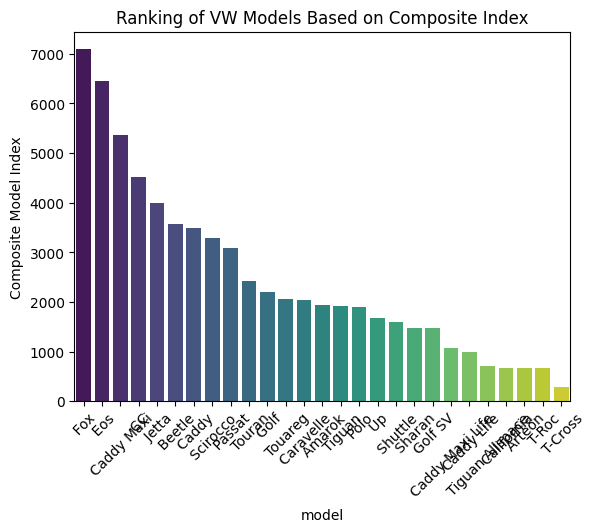

In [64]:
combined_df = pd.DataFrame(data)

features = ['mileage', 'tax', 'mpg', 'engineSize']
weights = {'mileage': 0.2, 'tax': 0.2, 'mpg': 0.3, 'engineSize': 0.5}

combined_df['model_index'] = 0

for model in combined_df['model'].unique():
    model_data = combined_df.loc[combined_df['model'] == model]

    model_index_value = sum(model_data[feature] * weights[feature] for feature in features)
    combined_df.loc[combined_df['model'] == model, 'model_index'] = model_index_value

model_rankings = combined_df.groupby('model')['model_index'].mean().sort_values(ascending=False)
print("Ranking of VW Models based on Composite Index:")
print(model_rankings)

sns.barplot(x=model_rankings.index, y=model_rankings.values, palette="viridis")
plt.xticks(rotation=45)
plt.ylabel('Composite Model Index')
plt.title('Ranking of VW Models Based on Composite Index')
plt.show()